In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [16]:
dict_benchmark = {'model_name':["BERT START", "BEST KNN", "BEST RANDOM FOREST",
                               "NAIVE BAYES - COUNTER VECTORIZER", "EMBEDDING LSTM", "DCNN DROPOUT BERT"],
                  'time': [500, 24, 36, 2, 68, 38],
                  'accuracy': [0.12, 0.16, 0.21, 0.61, 0.71, 0.77]}
data = pd.DataFrame(dict_benchmark)
data

,model_name,time,accuracy
0,BERT START,500,0.12
1,BEST KNN,24,0.16
2,BEST RANDOM FOREST,36,0.21
3,NAIVE BAYES - COUNTER VECTORIZER,2,0.61
4,EMBEDDING LSTM,68,0.71
5,DCNN DROPOUT BERT,38,0.77


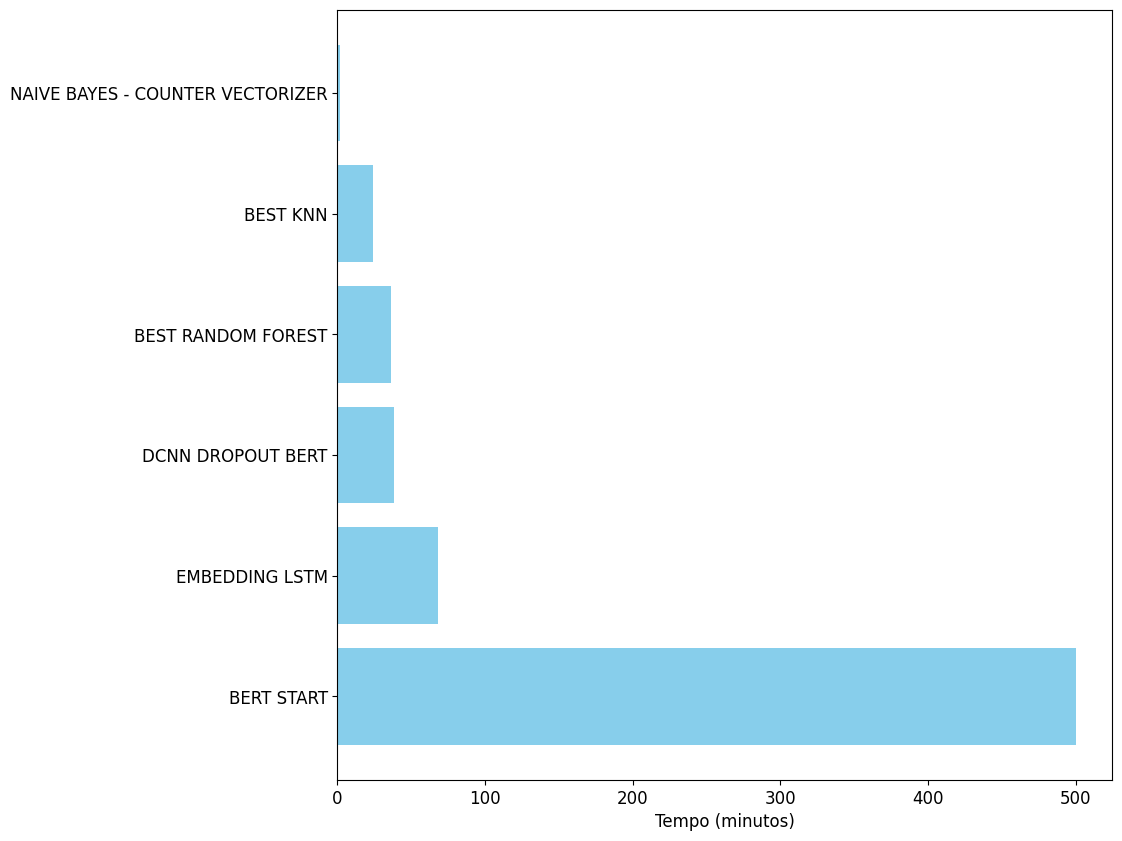

In [17]:
sorted_indices = sorted(range(len(data['time'])), key=lambda k: data['time'][k], reverse=True)

plt.rcParams.update({'font.size': 12})

# Criar gráfico de barras horizontais para o tempo de benchmarking
plt.figure(figsize=(10, 10))

# Extração de dados do dicionário
model_names = [data['model_name'][i] for i in sorted_indices]
times = [data['time'][i] for i in sorted_indices]

# Plotar o gráfico de barras
plt.barh(model_names, times, color='skyblue')
plt.xlabel('Tempo (minutos)')

# Adicionar legenda explicativa no eixo Y
plt.yticks(model_names, [f"{model}" for model in model_names])

# Aumentar o tamanho da fonte no eixo X e no título
plt.xticks(fontsize=12)

# Exibir o gráfico
plt.show()

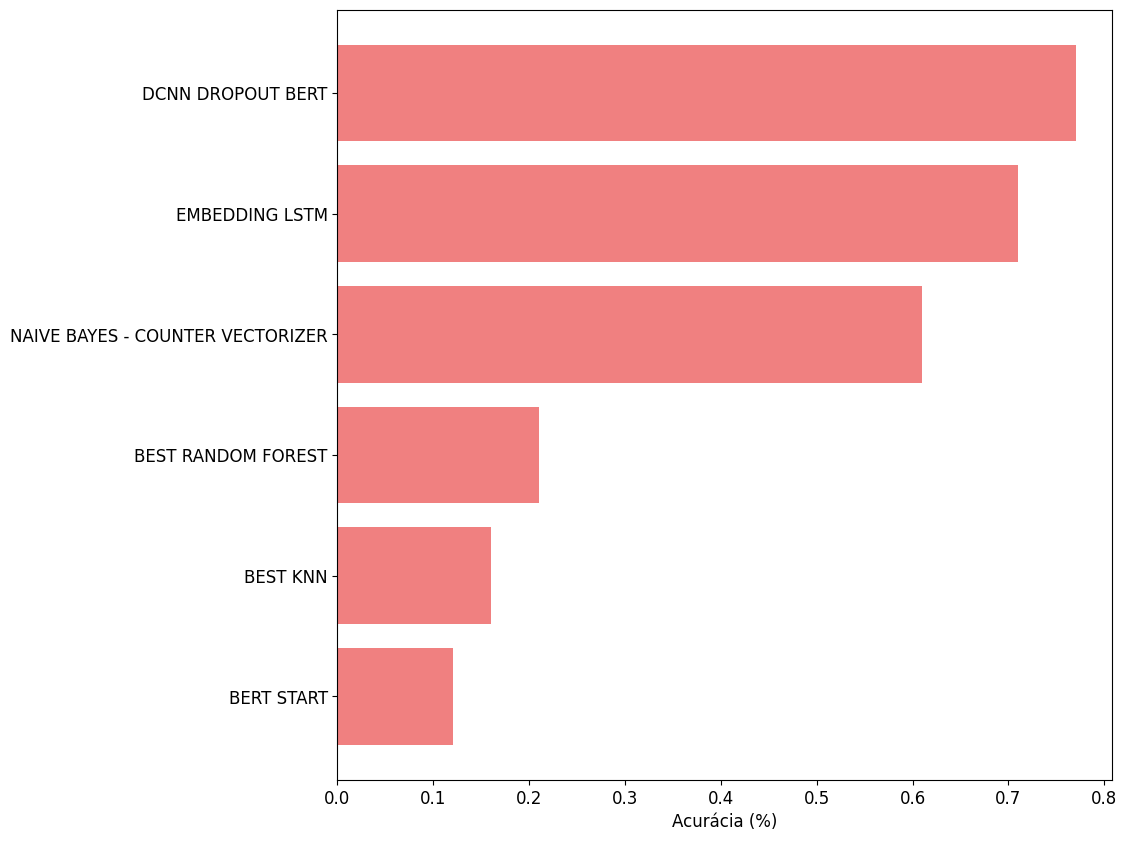

In [18]:
sorted_indices = sorted(range(len(data['accuracy'])), key=lambda k: data['accuracy'][k])

plt.rcParams.update({'font.size': 12})

# Criar gráfico de barras horizontais para o tempo de benchmarking
plt.figure(figsize=(10, 10))

# Extração de dados do dicionário
model_names = [data['model_name'][i] for i in sorted_indices]
times = [data['accuracy'][i] for i in sorted_indices]

# Plotar o gráfico de barras
plt.barh(model_names, times, color='lightcoral')
plt.xlabel('Acurácia (%)')

# Adicionar legenda explicativa no eixo Y
plt.yticks(model_names, [f"{model}" for model in model_names])

# Aumentar o tamanho da fonte no eixo X e no título
plt.xticks(fontsize=12)

# Exibir o gráfico
plt.show()

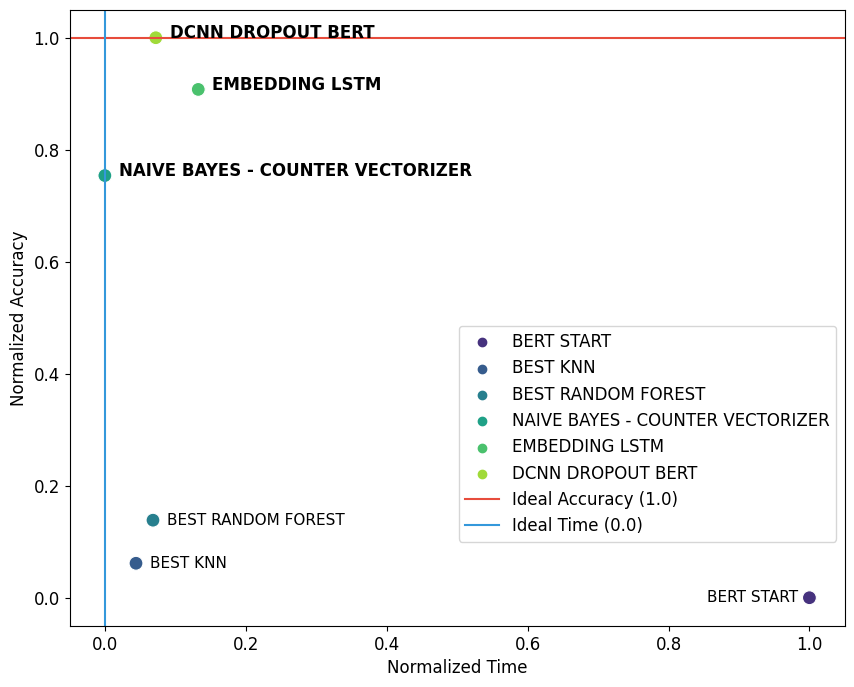

In [25]:
def min_max_normalize(data):
    min_val = min(data)
    max_val = max(data)
    normalized_data = [(x - min_val) / (max_val - min_val) for x in data]
    return normalized_data


# Normalizar ambas as variáveis (time e accuracy)
normalized_time = min_max_normalize(data['time'])
normalized_accuracy = min_max_normalize(data['accuracy'])

# Criar um gráfico de dispersão com uma paleta de cores atraente
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(x=normalized_time, y=normalized_accuracy, hue=data['model_name'], s=100, palette='viridis')

# Adicionar rótulos aos pontos
highlight_models = ["NAIVE BAYES - COUNTER VECTORIZER", "EMBEDDING LSTM", "DCNN DROPOUT BERT"]
for i, model_name in enumerate(data['model_name']):
    if model_name in highlight_models:
        scatter.text(normalized_time[i] + 0.02, normalized_accuracy[i], model_name, fontsize=12, ha='left', va='baseline',  fontweight='bold')
    elif model_name == "BERT START":
        scatter.text(normalized_time[i] - 0.08, normalized_accuracy[i], model_name, fontsize=11, ha='center', va='center')
    else:
        scatter.text(normalized_time[i] + 0.02, normalized_accuracy[i], model_name, fontsize=11, ha='left', va='center')


# Adicionar linhas de valores ideais com cores atraentes
plt.axhline(y=1, color='#e74c3c', linestyle='-', label='Ideal Accuracy (1.0)')
plt.axvline(x=0, color='#3498db', linestyle='-', label='Ideal Time (0.0)')

plt.xlabel('Normalized Time')
plt.ylabel('Normalized Accuracy')
plt.legend(bbox_to_anchor=(1, 0.5), loc='best')
plt.grid(False)
plt.show()


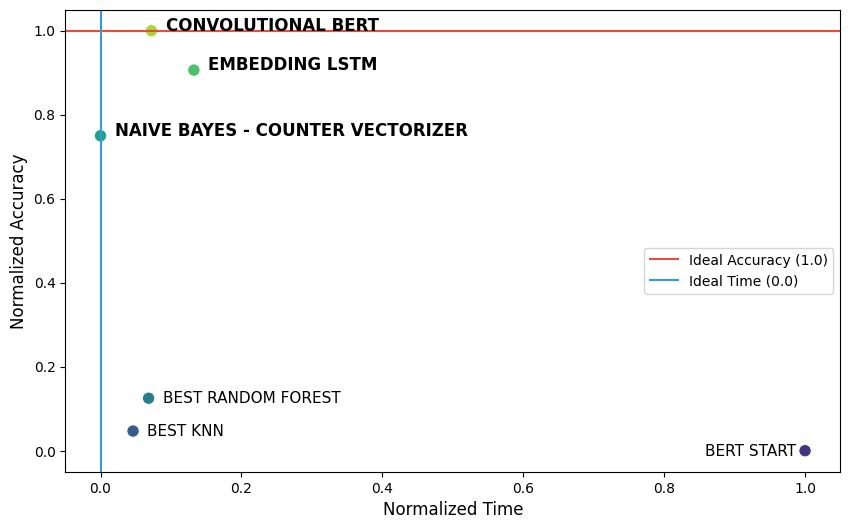

In [21]:
# Criar um gráfico de dispersão com uma paleta de cores atraente
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x=normalized_time, y=normalized_accuracy, hue=data['model_name'], s=80, palette='viridis', legend=False)

# Adicionar rótulos aos pontos apenas para modelos destacados
highlight_models = ["NAIVE BAYES - COUNTER VECTORIZER", "EMBEDDING LSTM", "CONVOLUTIONAL BERT"]
for i, model_name in enumerate(data['model_name']):
    if model_name in highlight_models:
        scatter.text(normalized_time[i] + 0.02, normalized_accuracy[i], model_name, fontsize=12, ha='left', va='baseline',  fontweight='bold')
    elif model_name == "BERT START":
        scatter.text(normalized_time[i] - 0.078, normalized_accuracy[i], model_name, fontsize=11, ha='center', va='center')
    else:
        scatter.text(normalized_time[i] + 0.02, normalized_accuracy[i], model_name, fontsize=11, ha='left', va='center')

# Adicionar linhas de valores ideais com cores atraentes
plt.axhline(y=1, color='#e74c3c', linestyle='-', label='Ideal Accuracy (1.0)')
plt.axvline(x=0, color='#3498db', linestyle='-', label='Ideal Time (0.0)')

plt.xlabel('Normalized Time', fontsize=12)
plt.ylabel('Normalized Accuracy', fontsize=12)
plt.legend(bbox_to_anchor=(1, 0.5), loc='best', fontsize=10)
plt.grid(False)
plt.show()
